In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
#from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from scipy import stats
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [5]:
#Reading dataset
data = pd.read_excel("Training_Data_Set_1.xlsx")
data.head()

,CLAIM_NO,INDEMNITY_PAID_TO_DATE_USD_AM,EXPENSE_PAID_TO_DATE_USD,Third_Party_Flag,Economic_Loss_Flag,FATAL_INJURY_IN,Fatal_Injury_In_Y,Fatal_Injury_In_N,Fatal_Injury_In_Space,HAS_INJURY_DETAILS,HAS_INJURY_DETAILS_TRUE,HAS_INJURY_DETAILS_FALSE,CLAIM_TYPE,Loss_Days_Since_Policy_First_Taken,Days_Loss_Notice,Loss_Days_before_Policy_Termination,LOSS_LOC_STATE_PROVINCE_NM,CLAIM_COUNT,Visibility_Score,Fraud
0,3221219558US,0.0,0.0,1,0,Y,1,0,0,NaN,0,0,Health Care,1822,1,1,Arizona,34,3,No
1,7640856703US,0.0,203.0,0,0,N,0,1,0,0.0,0,1,Auto Liability,149,753,217,Indiana,0,3,No
2,9500965780US,0.0,0.0,1,0,N,0,1,0,0.0,0,1,Health Care,1822,1,1,Arizona,0,3,No
3,5946393427US,0.0,580.0,1,0,N,0,1,0,0.0,0,1,Coverage,1153,1025,338,British Columbia,12,3,No
4,2407369559US,0.0,0.0,1,0,N,0,1,0,1.0,1,0,General Liability,101,55,264,West Virginia,109,1,No


In [6]:
#checking the number of columns and rows in the dataset
data.shape

(324, 20)

In [7]:
#Dataset summary
data.describe()

,INDEMNITY_PAID_TO_DATE_USD_AM,EXPENSE_PAID_TO_DATE_USD,Third_Party_Flag,Economic_Loss_Flag,Fatal_Injury_In_Y,Fatal_Injury_In_N,Fatal_Injury_In_Space,HAS_INJURY_DETAILS,HAS_INJURY_DETAILS_TRUE,HAS_INJURY_DETAILS_FALSE,Loss_Days_Since_Policy_First_Taken,Days_Loss_Notice,Loss_Days_before_Policy_Termination,CLAIM_COUNT,Visibility_Score
count,324.000000,324.000000,324.000000,324.0,324.000000,324.000000,324.000000,288.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,1732.616481,570.022469,0.919753,0.0,0.132716,0.864198,0.003086,0.597222,0.530864,0.358025,534.577160,1928.910494,256.728395,143.466049,2.694444
std,16218.411307,2123.192421,0.272095,0.0,0.339792,0.343109,0.055556,0.491310,0.499818,0.480161,791.228056,2918.749451,144.342537,742.327777,0.674043
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,0.000000,0.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.750000,142.250000,0.000000,3.000000
50%,0.000000,0.000000,1.000000,0.0,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,184.500000,463.000000,314.500000,6.000000,3.000000
75%,0.000000,500.000000,1.000000,0.0,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,750.250000,3126.000000,365.000000,31.250000,3.000000
max,230000.000000,24130.880000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4075.000000,15817.000000,798.000000,7810.000000,3.000000


In [8]:
# remove spaces in columns name
data.columns = data.columns.str.replace(' ','_')

In [9]:
#Although no missing values are present, there are values of '?' present,converting '?' as missing values '
#data.replace({"?": np.nan}, inplace = True)
data.isna().sum()

CLAIM_NO                                0
INDEMNITY_PAID_TO_DATE_USD_AM           0
EXPENSE_PAID_TO_DATE_USD                0
Third_Party_Flag                        0
Economic_Loss_Flag                      0
FATAL_INJURY_IN                         1
Fatal_Injury_In_Y                       0
Fatal_Injury_In_N                       0
Fatal_Injury_In_Space                   0
HAS_INJURY_DETAILS                     36
HAS_INJURY_DETAILS_TRUE                 0
HAS_INJURY_DETAILS_FALSE                0
CLAIM_TYPE                              0
Loss_Days_Since_Policy_First_Taken      0
Days_Loss_Notice                        0
Loss_Days_before_Policy_Termination     0
LOSS_LOC_STATE_PROVINCE_NM              0
CLAIM_COUNT                             0
Visibility_Score                        0
Fraud                                   0
dtype: int64

In [10]:
#Missing Values and their Percentage  column wise
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
CLAIM_NO,CLAIM_NO,0.000000
INDEMNITY_PAID_TO_DATE_USD_AM,INDEMNITY_PAID_TO_DATE_USD_AM,0.000000
EXPENSE_PAID_TO_DATE_USD,EXPENSE_PAID_TO_DATE_USD,0.000000
Third_Party_Flag,Third_Party_Flag,0.000000
Economic_Loss_Flag,Economic_Loss_Flag,0.000000
FATAL_INJURY_IN,FATAL_INJURY_IN,0.308642
Fatal_Injury_In_Y,Fatal_Injury_In_Y,0.000000
Fatal_Injury_In_N,Fatal_Injury_In_N,0.000000
Fatal_Injury_In_Space,Fatal_Injury_In_Space,0.000000
HAS_INJURY_DETAILS,HAS_INJURY_DETAILS,11.111111


# EDA

In [8]:
#Missing Value Imputation
def impute_nan(dataframe, column_name):
    frequent_value = dataframe[column_name].mode()[0]
    dataframe[column_name] = dataframe[column_name].fillna(frequent_value)

In [9]:
#These are Category column so imputation will be done on most frequent ones
for column in ["FATAL_INJURY_IN","HAS_INJURY_DETAILS"]:
    impute_nan(data, column)

In [10]:
numerical_values=['INDEMNITY_PAID_TO_DATE_USD_AM','EXPENSE_PAID_TO_DATE_USD','HAS_INJURY_DETAILS']
for i in numerical_values:
    data[i]=data[i].astype(int)

In [11]:
#Removing the Duplicate Recordsa
data.drop_duplicates(inplace=True)

In [12]:
cat=['Third_Party_Flag' ,'FATAL_INJURY_IN' ,'Fatal_Injury_In_Y' ,'Fatal_Injury_In_N' ,'Fatal_Injury_In_Space' ,'HAS_INJURY_DETAILS' ,'HAS_INJURY_DETAILS_TRUE' ,'HAS_INJURY_DETAILS_FALSE']
for col in cat:
    data[col] = data[col].astype('category',copy=False)

In [13]:
data['Fraud'] = data['Fraud'] .map({'Yes': 1, 'No': 0}).astype(int)

# numerical data exploration

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


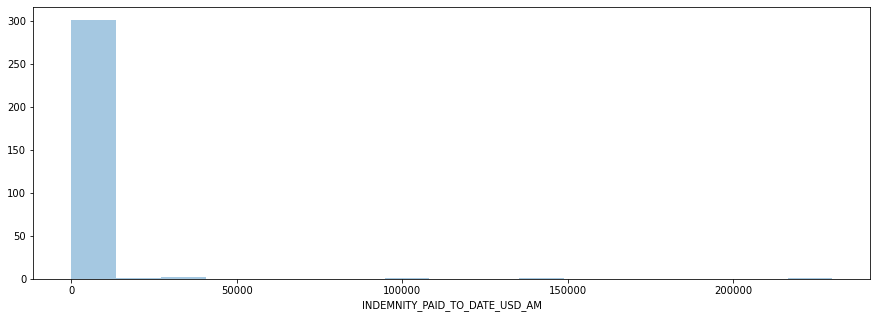

In [14]:
plt.figure(figsize=(15,5))
sns.distplot(data['INDEMNITY_PAID_TO_DATE_USD_AM'],kde=False)
plt.show()

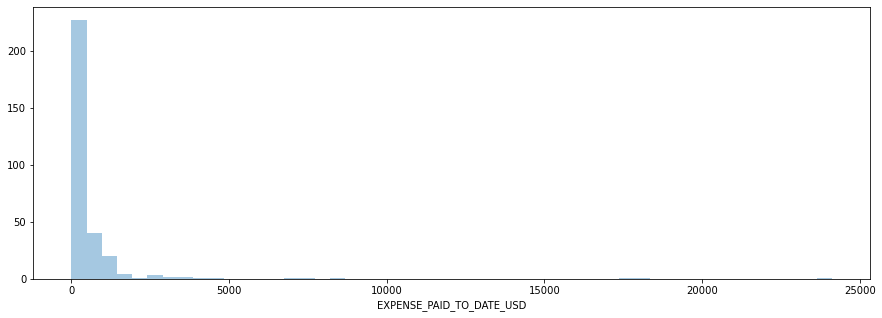

In [15]:
plt.figure(figsize=(15,5))
sns.distplot(data['EXPENSE_PAID_TO_DATE_USD'],kde=False)
plt.show()

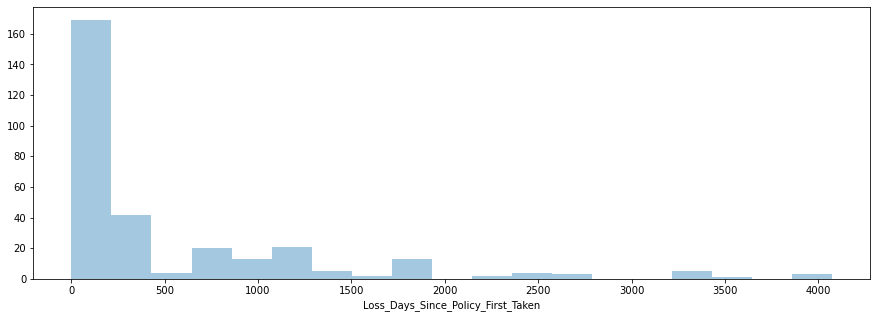

In [16]:
plt.figure(figsize=(15,5))
sns.distplot(data['Loss_Days_Since_Policy_First_Taken'],kde=False)
plt.show()

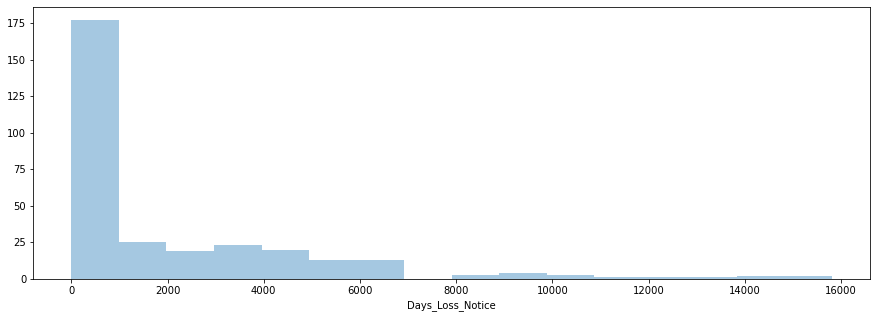

In [17]:
plt.figure(figsize=(15,5))
sns.distplot(data['Days_Loss_Notice'],kde=False)
plt.show()

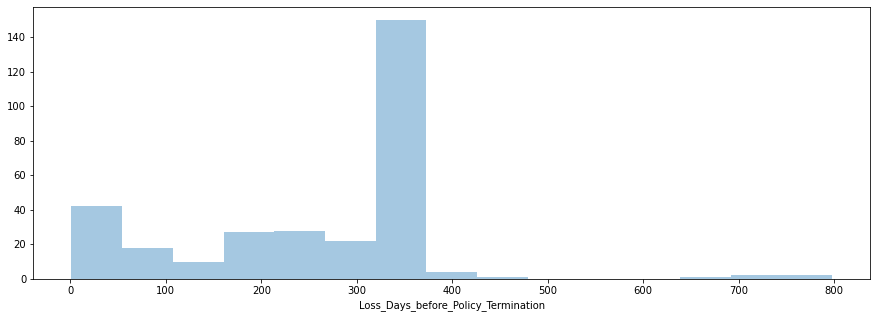

In [18]:
plt.figure(figsize=(15,5))
sns.distplot(data['Loss_Days_before_Policy_Termination'],kde=False)
plt.show()

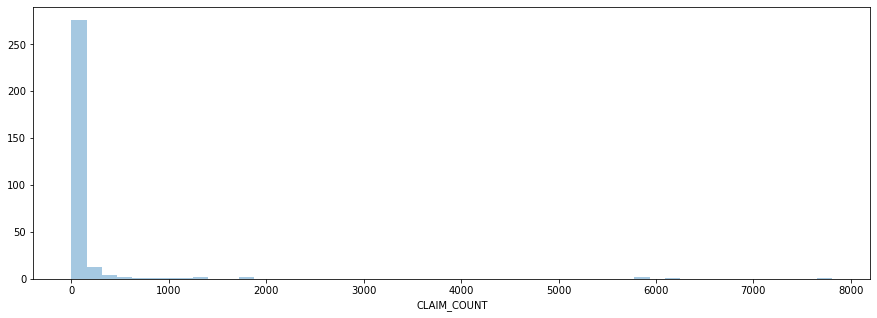

In [19]:
plt.figure(figsize=(15,5))
sns.distplot(data['CLAIM_COUNT'],kde=False)
plt.show()

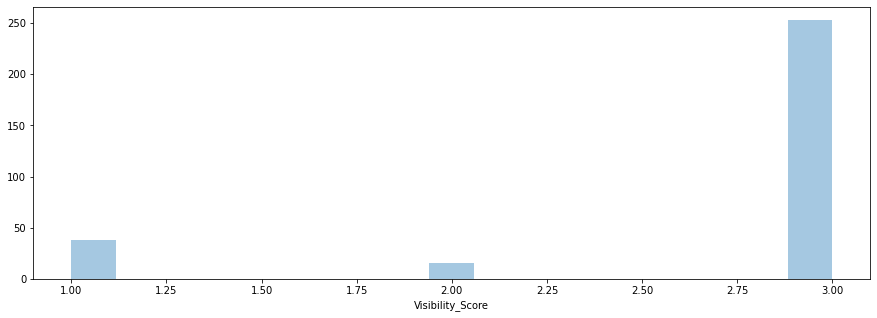

In [20]:
plt.figure(figsize=(15,5))
sns.distplot(data['Visibility_Score'],kde=False)
plt.show()

# Categorical data

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


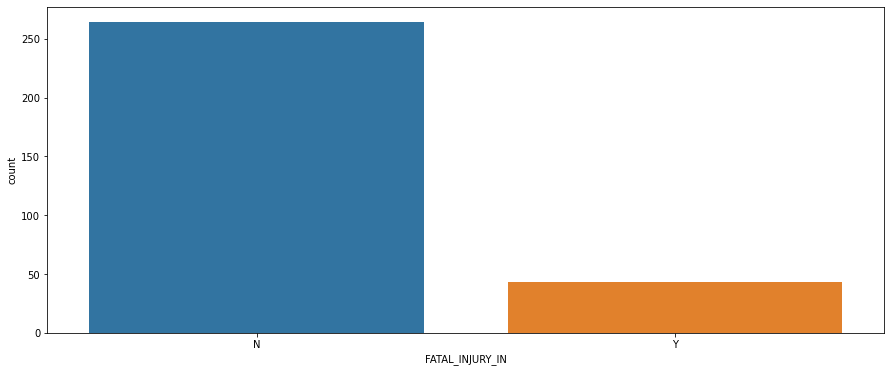

In [21]:
plt.figure(figsize=(15,6))
sns.countplot(data['FATAL_INJURY_IN'])
plt.show()

In [22]:
# Categorical data

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


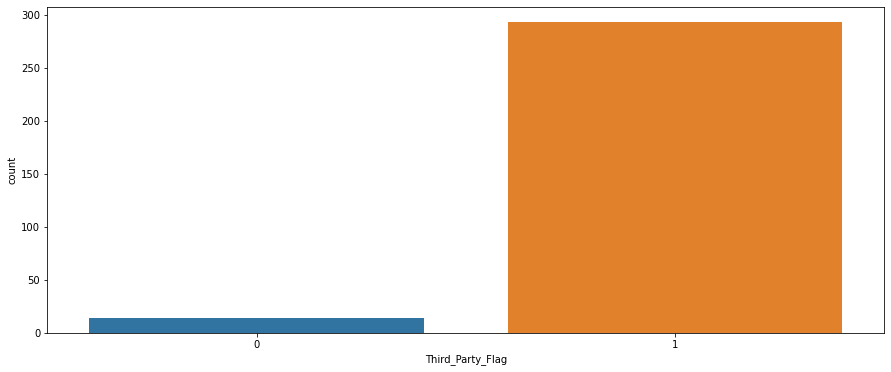

In [23]:
plt.figure(figsize=(15,6))
sns.countplot(data['Third_Party_Flag'])
plt.show()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


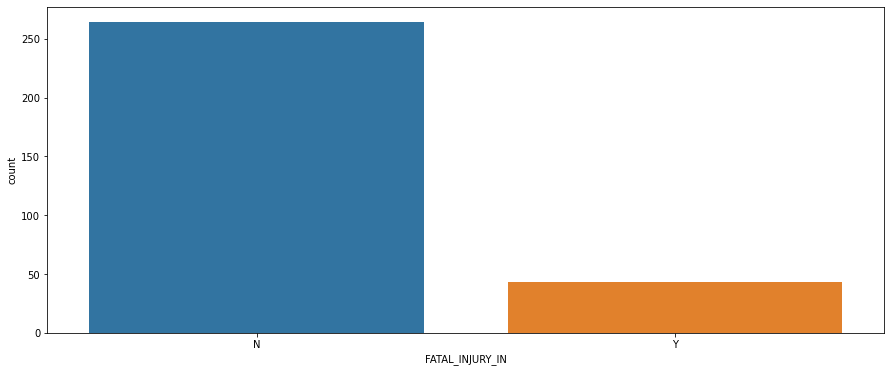

In [24]:
plt.figure(figsize=(15,6))
sns.countplot(data['FATAL_INJURY_IN'])
plt.show()


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


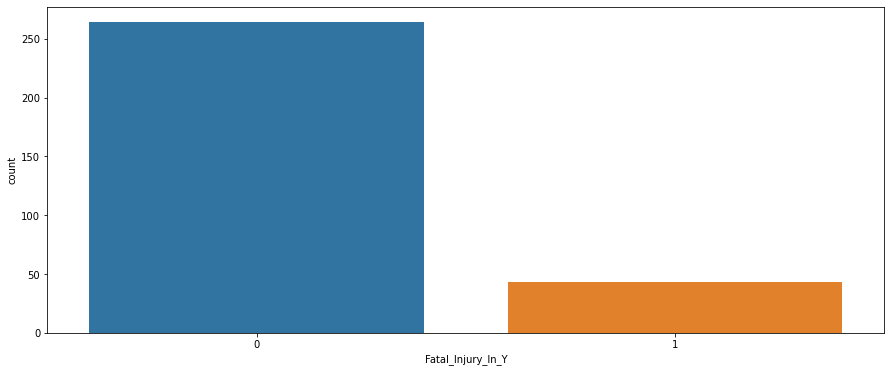

In [25]:
plt.figure(figsize=(15,6))
sns.countplot(data['Fatal_Injury_In_Y'])
plt.show()


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


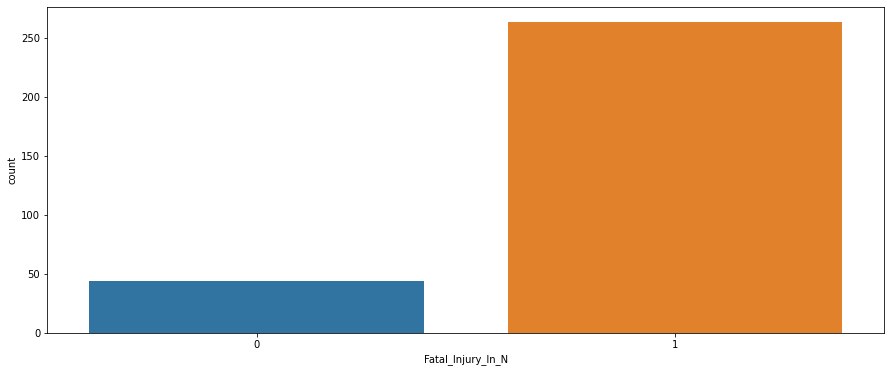

In [26]:
plt.figure(figsize=(15,6))
sns.countplot(data['Fatal_Injury_In_N'])
plt.show()


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


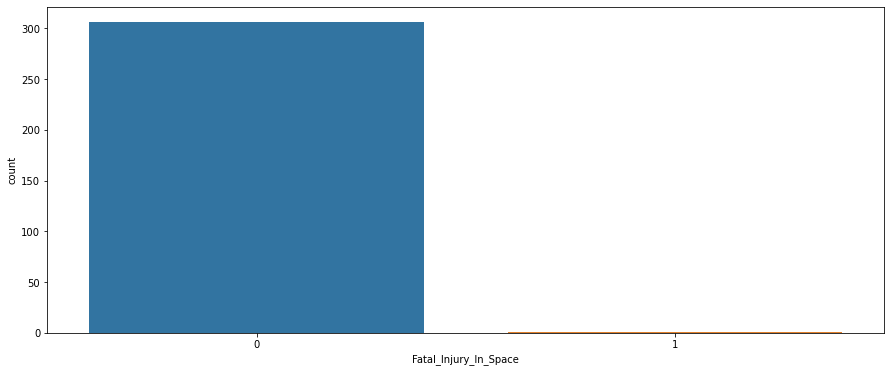

In [27]:
plt.figure(figsize=(15,6))
sns.countplot(data['Fatal_Injury_In_Space'])
plt.show()


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


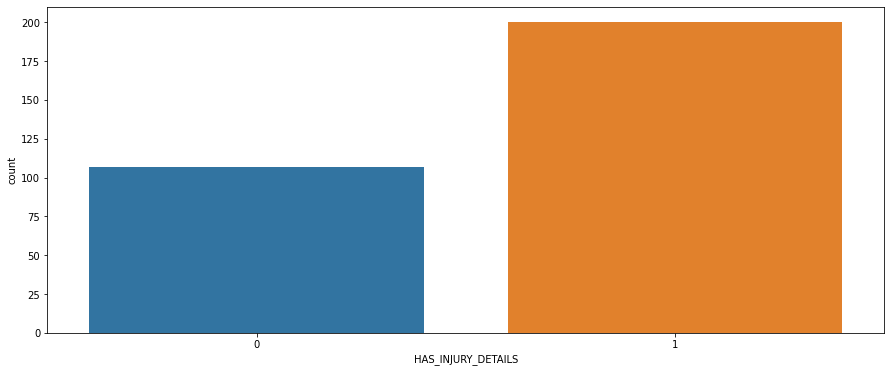

In [28]:
plt.figure(figsize=(15,6))
sns.countplot(data['HAS_INJURY_DETAILS'])
plt.show()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


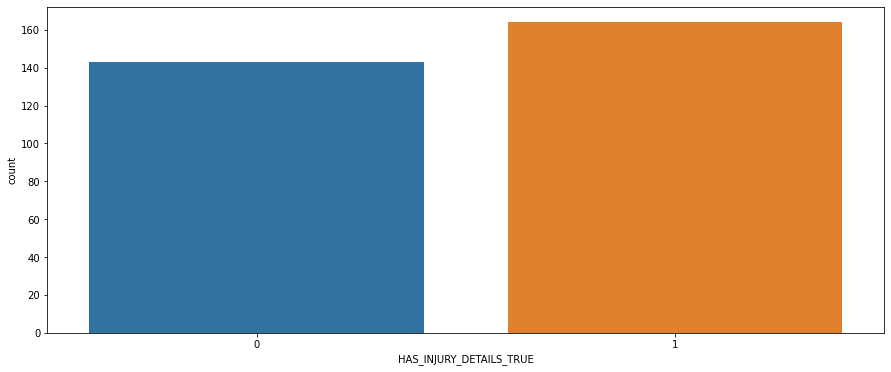

In [29]:
plt.figure(figsize=(15,6))
sns.countplot(data['HAS_INJURY_DETAILS_TRUE'])
plt.show()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


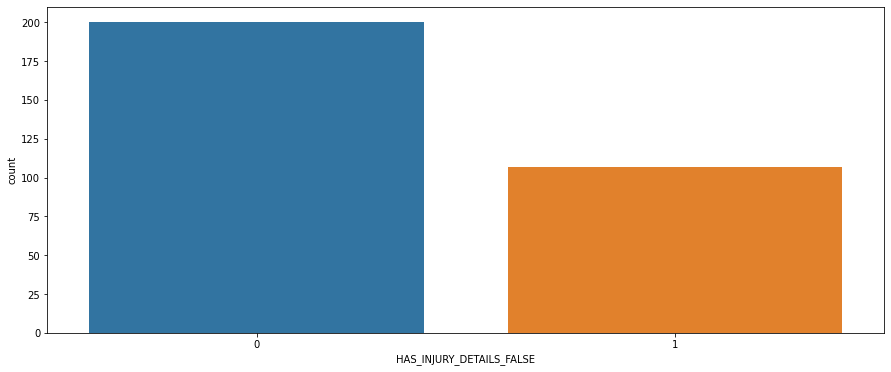

In [30]:
plt.figure(figsize=(15,6))
sns.countplot(data['HAS_INJURY_DETAILS_FALSE'])
plt.show()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


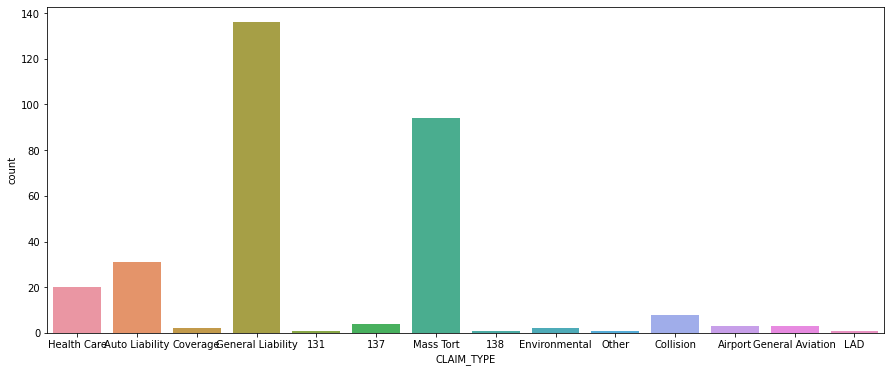

In [31]:
plt.figure(figsize=(15,6))
sns.countplot(data['CLAIM_TYPE'])
plt.show()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


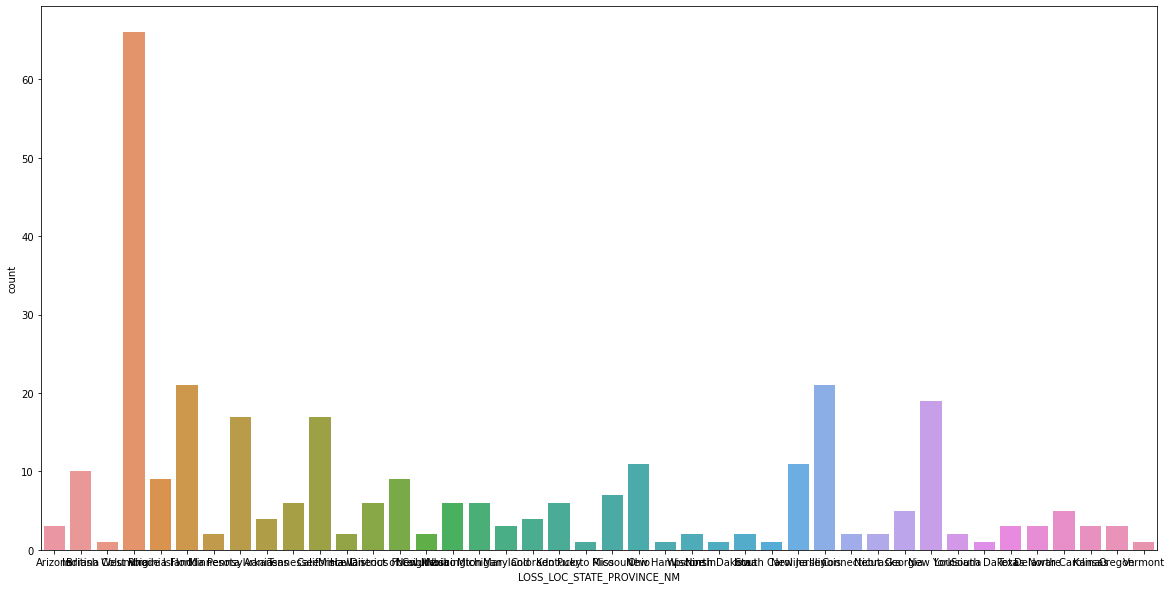

In [32]:
plt.figure(figsize=(20,10))
sns.countplot(data['LOSS_LOC_STATE_PROVINCE_NM'])
plt.show()

In [33]:
# Correlation Heatmap

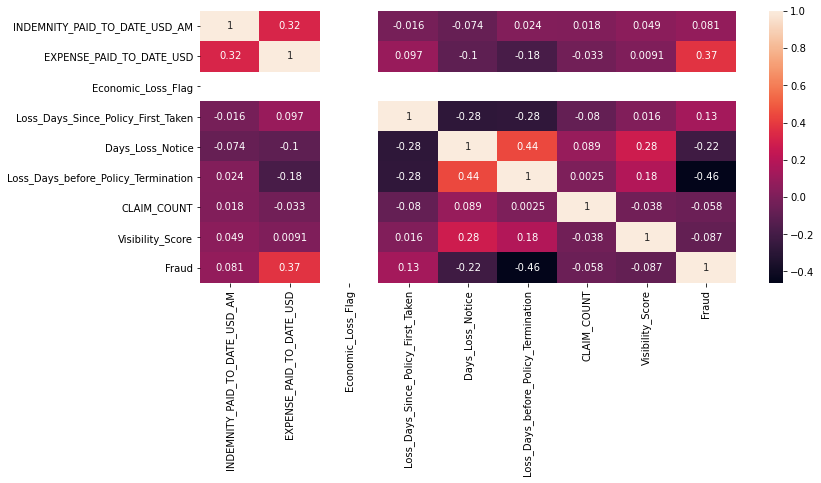

In [34]:
plt.figure(figsize=(12,5))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [35]:
#Feature Importance

In [36]:
def chi(features, target, df_f):
    if(len(features)!=0):
            ct=pd.DataFrame(columns = ['category name','chi square value','p value','degrees of freedom'])
            for i in features:
                for j in target:
                    ctz = pd.crosstab(df_f[i],df_f[j])
                    chisquare_value,p_value,degrees_of_freedom,_ = stats.chi2_contingency(ctz)
                    ct = ct.append({'category name' : i,'chi square value' : chisquare_value,'p value' : p_value,'degrees of freedom' :degrees_of_freedom},ignore_index=True)
            print('features with p_value < 0.05')
            display(ct[ct["p value"]< 0.05])
            ct_ = ct[ct["p value"]< 0.05]
            display(ct_.sort_values(by=['p value']))
            print('features with p_value between 0.05 and 0.75')
            display(ct[(ct["p value"]> 0.05) & (ct["p value"]<0.75)])
            ctt = ct[(ct["p value"]> 0.05) & (ct["p value"]<0.75)]
            display(ctt.sort_values(by=['p value']))
            print('features with p_value > 0.75')
            display(ct[ct["p value"]> 0.75])
            ctt_ = ct[ct["p value"]> 0.75]
            display(ctt_.sort_values(by=['p value']))
    else:
        print("No Categorical predictors found")

In [37]:
cat = ['Third_Party_Flag','FATAL_INJURY_IN','Fatal_Injury_In_Y','Fatal_Injury_In_N','Fatal_Injury_In_Space','HAS_INJURY_DETAILS','HAS_INJURY_DETAILS_TRUE','HAS_INJURY_DETAILS_FALSE','CLAIM_TYPE','LOSS_LOC_STATE_PROVINCE_NM']
for col in cat: 
    data[col] = data[col].astype('category')

In [38]:
chi(cat, ['Fraud'], data)

features with p_value < 0.05


,category name,chi square value,p value,degrees of freedom
0,Third_Party_Flag,33.389170,7.544292e-09,1
1,FATAL_INJURY_IN,4.011075,4.520232e-02,1
2,Fatal_Injury_In_Y,4.011075,4.520232e-02,1
3,Fatal_Injury_In_N,4.146292,4.172581e-02,1
8,CLAIM_TYPE,164.800421,2.099120e-28,13
9,LOSS_LOC_STATE_PROVINCE_NM,133.006291,1.195871e-11,41


,category name,chi square value,p value,degrees of freedom
8,CLAIM_TYPE,164.800421,2.099120e-28,13
9,LOSS_LOC_STATE_PROVINCE_NM,133.006291,1.195871e-11,41
0,Third_Party_Flag,33.389170,7.544292e-09,1
3,Fatal_Injury_In_N,4.146292,4.172581e-02,1
1,FATAL_INJURY_IN,4.011075,4.520232e-02,1
2,Fatal_Injury_In_Y,4.011075,4.520232e-02,1


features with p_value between 0.05 and 0.75


,category name,chi square value,p value,degrees of freedom
4,Fatal_Injury_In_Space,1.928914,0.164877,1
5,HAS_INJURY_DETAILS,0.325203,0.568498,1
6,HAS_INJURY_DETAILS_TRUE,0.155538,0.693298,1
7,HAS_INJURY_DETAILS_FALSE,0.325203,0.568498,1


,category name,chi square value,p value,degrees of freedom
4,Fatal_Injury_In_Space,1.928914,0.164877,1
5,HAS_INJURY_DETAILS,0.325203,0.568498,1
7,HAS_INJURY_DETAILS_FALSE,0.325203,0.568498,1
6,HAS_INJURY_DETAILS_TRUE,0.155538,0.693298,1


features with p_value > 0.75


,category name,chi square value,p value,degrees of freedom


,category name,chi square value,p value,degrees of freedom


# Scaling and Spliiting the Dataset with Training and Testing

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [40]:
#Target Variable
y = data['Fraud']

In [41]:
data_ = data.drop(labels = ['Fraud','CLAIM_NO'],axis=1)

In [42]:
#one hot encoding for categorical values
X = pd.get_dummies(data_, drop_first=True)

In [43]:
# applying minmax scalar for independent variables
x_tmp = scaler.fit_transform(X)

In [44]:
x_scaled = pd.DataFrame(x_tmp, columns=X.columns)
x_scaled.head()

,INDEMNITY_PAID_TO_DATE_USD_AM,EXPENSE_PAID_TO_DATE_USD,Economic_Loss_Flag,Loss_Days_Since_Policy_First_Taken,Days_Loss_Notice,Loss_Days_before_Policy_Termination,CLAIM_COUNT,Visibility_Score,Third_Party_Flag_1,FATAL_INJURY_IN_Y,...,LOSS_LOC_STATE_PROVINCE_NM_Puerto Rico,LOSS_LOC_STATE_PROVINCE_NM_Rhode Island,LOSS_LOC_STATE_PROVINCE_NM_South Carolina,LOSS_LOC_STATE_PROVINCE_NM_South Dakota,LOSS_LOC_STATE_PROVINCE_NM_Tennessee,LOSS_LOC_STATE_PROVINCE_NM_Texas,LOSS_LOC_STATE_PROVINCE_NM_Vermont,LOSS_LOC_STATE_PROVINCE_NM_Washington,LOSS_LOC_STATE_PROVINCE_NM_West Virginia,LOSS_LOC_STATE_PROVINCE_NM_Wisconsin
0,0.0,0.000000,0.0,0.447117,0.000063,0.000000,0.004353,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.008413,0.0,0.036564,0.047607,0.271016,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.447117,0.000063,0.000000,0.000000,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.024036,0.0,0.282945,0.064804,0.422836,0.001536,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.024785,0.003477,0.329987,0.013956,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
#splitting the data set for training and testing
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2)

# Model(s) Building / Training and Testing (With Cross Validation)

In [46]:
scores = []
models = []

In [47]:
#function for plotting confusion matrix
def plot_cm(y_true, y_pred):
    cm =confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    plt.show()

In [48]:
from sklearn.model_selection import cross_val_score

# function to print cross k-fold cross validation scores, their mean and variance(standard deviation)
def print_scores(model, x_train, y_train, cv, scoring):
    print('Cross validation scores:', cross_val_score(model, x_train.values, y_train, cv=cv, scoring=scoring, n_jobs=-1) )
    print( 'Mean of scores:', np.mean( cross_val_score(model, x_train.values, y_train, cv=cv, scoring=scoring, n_jobs=-1) ) )
    print( 'Variance:', np.std( cross_val_score(model, x_train.values, y_train, cv=cv, scoring=scoring, n_jobs=-1) ) )
    

# LogisticRegression

In [49]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42, n_jobs=-1)

In [50]:
print_scores(lr,X_train, y_train, 5, 'accuracy')

Cross validation scores: [0.97959184 0.97959184 0.91836735 0.97959184 0.91836735]
Mean of scores: 0.9551020408163264
Variance: 0.029993751952447058


In [51]:
lr.fit(X_train.values, y_train)

LogisticRegression(n_jobs=-1, random_state=42)

In [52]:
lr_preds = lr.predict(X_test.values)

In [53]:
lr_score = accuracy_score(y_test, lr_preds) * 100
scores.append(lr_score)
models.append('Logistic Regression')

In [54]:
print('Logistic Regression  F1 score:', f1_score(y_test, lr_preds))
print('Logistic Regression Recall:', recall_score(y_test, lr_preds))
print('Logistic Regression Precision:', precision_score(y_test, lr_preds))

Logistic Regression  F1 score: 0.8750000000000001
Logistic Regression Recall: 0.7777777777777778
Logistic Regression Precision: 1.0


Logistic Regression Accuracy =  96.7741935483871


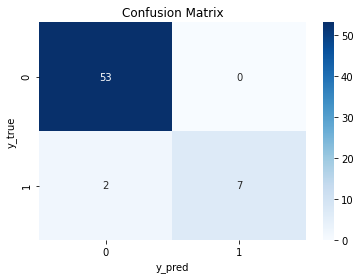

In [55]:
print('Logistic Regression Accuracy = ', lr_score)
plot_cm(y_test, lr_preds)

# Support Vector Machine

In [56]:
from sklearn.svm import SVC
svc = SVC(random_state=42)

In [57]:
print_scores(svc, X_train, y_train, 5, 'accuracy')

Cross validation scores: [0.97959184 0.95918367 0.91836735 0.97959184 0.91836735]
Mean of scores: 0.9510204081632653
Variance: 0.02768297952296026


In [58]:
svc.fit(X_train.values, y_train)

SVC(random_state=42)

In [59]:
svc_preds = svc.predict(X_test.values)

In [60]:
svc_score = accuracy_score(y_test, svc_preds) * 100
scores.append(svc_score)
models.append('Support Vector Classifier')

In [61]:
print('Support Vector Classifier  F1 score:', f1_score(y_test, svc_preds))
print('Support Vector Classifier Recall:', recall_score(y_test, svc_preds))
print('Support Vector Classifier Precision:', precision_score(y_test, svc_preds))

Support Vector Classifier  F1 score: 0.8750000000000001
Support Vector Classifier Recall: 0.7777777777777778
Support Vector Classifier Precision: 1.0


Support Vector Classifier Accuracy =  96.7741935483871


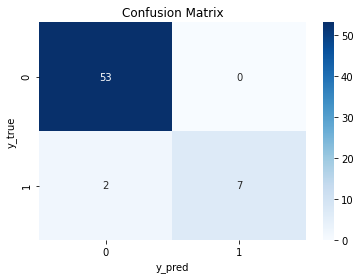

In [62]:
print('Support Vector Classifier Accuracy = ', svc_score)
plot_cm(y_test, svc_preds)

# KNN

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)

In [64]:
print_scores(knn, X_train, y_train, 5, 'accuracy')

Cross validation scores: [0.93877551 0.95918367 0.91836735 0.97959184 0.89795918]
Mean of scores: 0.9387755102040817
Variance: 0.028861501272920292


In [65]:
knn.fit(X_train.values, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

In [66]:
knn_preds = knn.predict(X_test.values)

In [67]:
print('KNeighbors  F1 score:', f1_score(y_test, knn_preds))
print('KNeighbors Recall:', recall_score(y_test, knn_preds))
print('KNeighbors Precision:', precision_score(y_test, knn_preds))

KNeighbors  F1 score: 0.8888888888888888
KNeighbors Recall: 0.8888888888888888
KNeighbors Precision: 0.8888888888888888


In [68]:
knn_score = accuracy_score(y_test, knn_preds) * 100
scores.append(knn_score)
models.append('K-Nearest Neighbors Classifier')

K-Nearest Neighbors Classifier Accuracy =  96.7741935483871


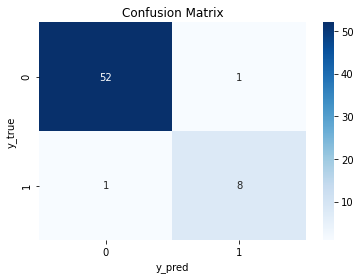

In [69]:
print('K-Nearest Neighbors Classifier Accuracy = ', knn_score)
plot_cm(y_test, knn_preds)

# Naive Bayes

In [70]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [71]:
print_scores(gnb, X_train, y_train, 5, 'accuracy')

Cross validation scores: [0.97959184 0.95918367 0.93877551 1.         0.89795918]
Mean of scores: 0.9551020408163264
Variance: 0.035111531702214795


In [72]:
gnb.fit(X_train.values, y_train)

GaussianNB()

In [73]:
gnb_preds = gnb.predict(X_test.values)

In [74]:
print('Naive Bayes  F1 score:', f1_score(y_test, gnb_preds))
print('Naive Bayes Recall:', recall_score(y_test, gnb_preds))
print('Naive Bayes Precision:', precision_score(y_test, gnb_preds))

Naive Bayes  F1 score: 0.8571428571428571
Naive Bayes Recall: 1.0
Naive Bayes Precision: 0.75


In [75]:
gnb_score = accuracy_score(y_test, gnb_preds) * 100
scores.append(gnb_score)
models.append('Naive Bayes Classifier')

Naive Bayes Classifier Accuracy =  95.16129032258065


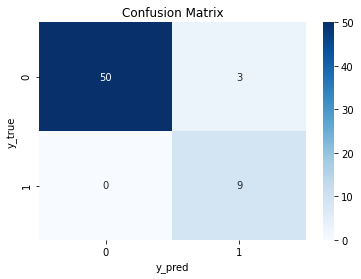

In [76]:
print('Naive Bayes Classifier Accuracy = ', gnb_score)
plot_cm(y_test, gnb_preds)

# SGDClassifier

In [77]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', n_jobs=-1, random_state=42)


In [78]:
print_scores(sgd, X_train, y_train, 5, 'accuracy')

Cross validation scores: [0.97959184 0.97959184 0.95918367 1.         0.93877551]
Mean of scores: 0.9714285714285713
Variance: 0.02081232454527666


In [79]:
sgd.fit(X_train.values, y_train)
sgd_preds = sgd.predict(X_test.values)

In [80]:
sgd_score = accuracy_score(y_test, sgd_preds) * 100
scores.append(sgd_score)
models.append('SGD Classifier')

In [81]:
print('SGDClassifier  F1 score:', f1_score(y_test, sgd_preds))
print('SGDClassifier Recall:', recall_score(y_test, sgd_preds))
print('SGDClassifier Precision:', precision_score(y_test, sgd_preds))

SGDClassifier  F1 score: 0.7999999999999999
SGDClassifier Recall: 0.8888888888888888
SGDClassifier Precision: 0.7272727272727273


SGD Classifier Accuracy =  93.54838709677419


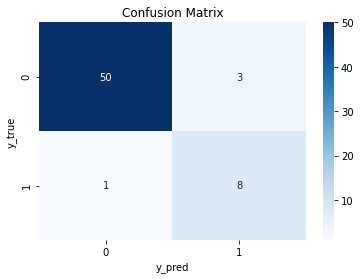

In [82]:
print('SGD Classifier Accuracy = ', sgd_score)
plot_cm(y_test, sgd_preds)


# DecisionTree

In [83]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

In [84]:
print_scores(dt, X_train, y_train, 5, 'accuracy')

Cross validation scores: [0.97959184 0.97959184 0.95918367 0.95918367 0.93877551]
Mean of scores: 0.963265306122449
Variance: 0.015272070966424233


In [85]:
dt.fit(X_train.values, y_train)

DecisionTreeClassifier(random_state=42)

In [86]:
dt_preds = dt.predict(X_test.values)

In [87]:
print('DecisionTreeClassifier  F1 score:', f1_score(y_test, dt_preds))
print('DecisionTreeClassifier Recall:', recall_score(y_test, dt_preds))
print('DecisionTreeClassifier Precision:', precision_score(y_test, dt_preds))

DecisionTreeClassifier  F1 score: 1.0
DecisionTreeClassifier Recall: 1.0
DecisionTreeClassifier Precision: 1.0


In [88]:
dt_score = accuracy_score(y_test, dt_preds) * 100
scores.append(dt_score)
models.append('Decision Tree Classifier')

Decision Tree Classifier Accuracy =  100.0


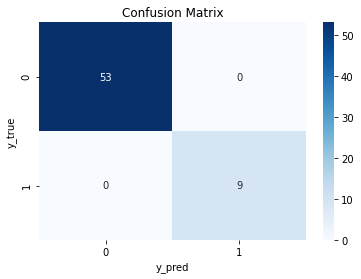

In [89]:
print('Decision Tree Classifier Accuracy = ', dt_score)
plot_cm(y_test, dt_preds)

# RandomForest

In [90]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [91]:
print_scores(rf, X_train, y_train, 5, 'accuracy')

Cross validation scores: [0.97959184 0.97959184 0.93877551 1.         0.93877551]
Mean of scores: 0.9673469387755101
Variance: 0.02448979591836732


In [92]:
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

In [93]:
print('RandomForestClassifier  F1 score:', f1_score(y_test, rf_preds))
print('RandomForestClassifier Recall:', recall_score(y_test, rf_preds))
print('RandomForestClassifier Precision:', precision_score(y_test, rf_preds))

RandomForestClassifier  F1 score: 0.9411764705882353
RandomForestClassifier Recall: 0.8888888888888888
RandomForestClassifier Precision: 1.0


In [94]:
rf_score = accuracy_score(y_test, rf_preds) * 100
scores.append(rf_score)
models.append('Random Forest Classifier')

Random Forest Classifier Accuracy =  98.38709677419355


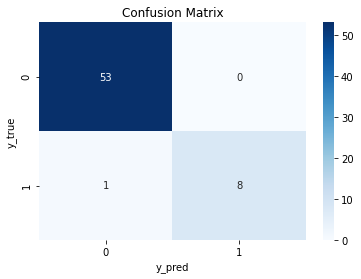

In [95]:
print('Random Forest Classifier Accuracy = ', rf_score)
plot_cm(y_test, rf_preds)

# XGBOOST

In [96]:
xg = XGBClassifier(n_estimators=500, random_state=42)

In [97]:
print_scores(xg, X_train, y_train, 5, 'accuracy')

Cross validation scores: [0.97959184 0.97959184 0.95918367 1.         0.93877551]
Mean of scores: 0.9714285714285713
Variance: 0.02081232454527666


In [98]:
xg.fit(X_train, y_train)
xg_preds = xg.predict(X_test)

[15:31:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [99]:
print('XG  F1 score:', f1_score(y_test, xg_preds))
print('XG Recall:', recall_score(y_test, xg_preds))
print('XG Precision:', precision_score(y_test, xg_preds))

XG  F1 score: 0.9411764705882353
XG Recall: 0.8888888888888888
XG Precision: 1.0


In [100]:
xg_score = accuracy_score(y_test, xg_preds) * 100
scores.append(xg_score)
models.append('XGboost')

XG Classifier Accuracy =  98.38709677419355


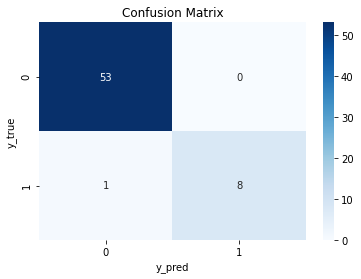

In [101]:
print('XG Classifier Accuracy = ', xg_score)
plot_cm(y_test, rf_preds)

# Accuracy Comparision

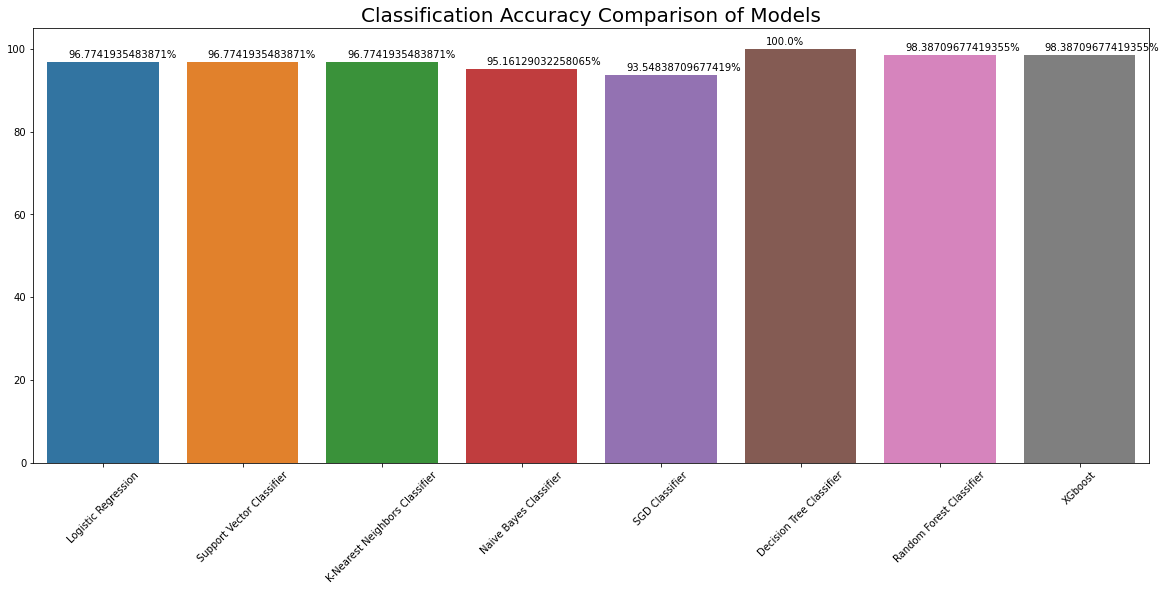

In [102]:
plt.figure(figsize=(20,8))
ax = sns.barplot(x=models, y=scores)
ax.set_title('Classification Accuracy Comparison of Models', fontsize=20)
for item in ax.get_xticklabels():
    item.set_rotation(45)
for p in ax.patches:
        ax.annotate('{:}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

# Finalizing the model

In [103]:
df1=pd.read_excel("Validation_Data_Set.xlsx")

In [104]:
df1.columns = data.columns.str.replace(' ','_')

In [105]:
df1.shape

(323, 20)

In [106]:
percent_missing = df1.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
CLAIM_NO,CLAIM_NO,0.000000
INDEMNITY_PAID_TO_DATE_USD_AM,INDEMNITY_PAID_TO_DATE_USD_AM,0.000000
EXPENSE_PAID_TO_DATE_USD,EXPENSE_PAID_TO_DATE_USD,0.000000
Third_Party_Flag,Third_Party_Flag,0.000000
Economic_Loss_Flag,Economic_Loss_Flag,0.000000
FATAL_INJURY_IN,FATAL_INJURY_IN,0.651466
Fatal_Injury_In_Y,Fatal_Injury_In_Y,0.000000
Fatal_Injury_In_N,Fatal_Injury_In_N,0.000000
Fatal_Injury_In_Space,Fatal_Injury_In_Space,0.000000
HAS_INJURY_DETAILS,HAS_INJURY_DETAILS,8.143322


In [107]:
for column in ["FATAL_INJURY_IN","HAS_INJURY_DETAILS"]:
    impute_nan(df1, column)

In [108]:
numerical_values=['INDEMNITY_PAID_TO_DATE_USD_AM','EXPENSE_PAID_TO_DATE_USD','HAS_INJURY_DETAILS']
for i in numerical_values:
    df1[i]=df1[i].astype(int)

cat=['Third_Party_Flag' ,'FATAL_INJURY_IN' ,'Fatal_Injury_In_Y' ,'Fatal_Injury_In_N' ,'Fatal_Injury_In_Space' ,'HAS_INJURY_DETAILS' ,'HAS_INJURY_DETAILS_TRUE' ,'HAS_INJURY_DETAILS_FALSE']
for col in cat:
    df1[col] = df1[col].astype('category',copy=False)

In [109]:
df1['Fraud'] = df1['Fraud'] .map({'Yes': 1, 'No': 0}).astype(int)
df1_ = df1.drop(labels = ['Fraud','CLAIM_NO'],axis=1)

In [110]:
X = pd.get_dummies(df1_, drop_first=True)
x_tmp = scaler.fit_transform(X)

In [111]:
x_scaled = pd.DataFrame(x_tmp, columns=X.columns)

In [112]:
#xg_preds = rf.predict(X_test)
xg_preds = xg.predict(x_scaled)
df1['Fraud']=xg_preds
df1['Fraud'] = df1['Fraud'] .replace(1,'Yes').replace(0,'No')

In [113]:
df1.to_csv('validation_results.csv')